### Datetime moudle in Python


In [1]:
from datetime import datetime
date_str = '09-19-2018'

date_object = datetime.strptime(date_str, '%m-%d-%Y').date()
print(type(date_object))
print(date_object)  # printed in default formatting

<class 'datetime.date'>
2018-09-19


In [2]:
date_object.day

19

In [3]:
date_object.month

9

In [4]:
date_object.weekday()

2

In [5]:
from datetime import datetime

datetime_str = '09/19/18 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')

print(type(datetime_object))
print(datetime_object)  # printed in default format

<class 'datetime.datetime'>
2018-09-19 13:55:26


### Datetime in Pandas

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("./gwangju_eco.txt", encoding="cp949", sep="\t").T.reset_index()
df.columns = ["date", "category", "value"]
df = df.drop(0).reset_index(drop=True)
date_temp_df = df["date"].str.split(".", expand=True)
df["date"] = date_temp_df[0].str.strip() + "-" + date_temp_df[1].str.strip()
df["date"] = pd.to_datetime(df["date"], format='%Y/%m')
df["value"] = df["value"].astype(float)
result_df = pd.crosstab(df["date"], df["category"], df["value"], aggfunc=sum)
result_df

category,경제활동인구 (천명),고용률 (%),실업률 (%),실업자 (천명),취업자 (천명)
date,,,,,
2016-01-01,746.1,57.5,3.2,23.8,722.3
2016-02-01,752.7,57.5,4.0,30.3,722.4
2016-03-01,738.8,57.2,2.8,20.7,718.2
2016-04-01,748.1,57.8,2.9,21.5,726.6
2016-05-01,758.1,58.7,2.7,20.4,737.7
2016-06-01,763.4,58.8,3.1,23.6,739.8
2016-07-01,760.1,58.7,2.8,21.6,738.5
2016-08-01,758.9,58.3,3.4,25.6,733.4
2016-09-01,755.8,57.9,3.6,26.9,728.9


## Time-Series Prediction: Kaggle Bike Sharing Demand



In [8]:
import pandas as pd
import os 
DATA_DIR = "bike_demand"
os.listdir(DATA_DIR)

['sampleSubmission.csv', 'test.csv', 'train.csv']

In [9]:
df = pd.read_csv(
        os.path.join(DATA_DIR, "train.csv"), 
    parse_dates = ['datetime'])
df.set_index("datetime", inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
df["month"] = df.index.month
df["year"] = df.index.year

df.groupby(
    ["year", "month"])["count"].sum().reset_index()

,year,month,count
0,2011,1,23552
1,2011,2,32844
2,2011,3,38735
3,2011,4,50517
4,2011,5,79713
5,2011,6,89776
6,2011,7,92848
7,2011,8,83296
8,2011,9,79104
9,2011,10,79522


In [11]:
df = pd.read_csv(
        os.path.join(DATA_DIR, "train.csv"), 
    parse_dates = ['datetime'])
df.set_index("datetime", inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
df["count"].resample('M').sum()

datetime
2011-01-31     23552
2011-02-28     32844
2011-03-31     38735
2011-04-30     50517
2011-05-31     79713
2011-06-30     89776
2011-07-31     92848
2011-08-31     83296
2011-09-30     79104
2011-10-31     79522
2011-11-30     70889
2011-12-31     61183
2012-01-31     56332
2012-02-29     66269
2012-03-31     94766
2012-04-30    116885
2012-05-31    120434
2012-06-30    130957
2012-07-31    121769
2012-08-31    130220
2012-09-30    133425
2012-10-31    127912
2012-11-30    105551
2012-12-31     98977
Freq: M, Name: count, dtype: int64

In [13]:
df["count"].resample('D').sum()
df["count"].resample('M').sum()
df["count"].resample('W').sum()
df["count"].resample('Q').sum()

datetime
2011-03-31     95131
2011-06-30    220006
2011-09-30    255248
2011-12-31    211594
2012-03-31    217367
2012-06-30    368276
2012-09-30    385414
2012-12-31    332440
Freq: Q-DEC, Name: count, dtype: int64

In [14]:
time = pd.date_range('1/1/2000', periods=5, freq='T')
time

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00'],
              dtype='datetime64[ns]', freq='T')

In [15]:
period = pd.date_range(
    start='2011-01-01', end='2011-05-31', freq='M')
df["count"].resample('M').sum()[period]

2011-01-31    23552
2011-02-28    32844
2011-03-31    38735
2011-04-30    50517
2011-05-31    79713
Freq: M, Name: count, dtype: int64

In [16]:
df["count"].resample('D').sum()

datetime
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-15    5047
2012-12-16    3786
2012-12-17    4585
2012-12-18    5557
2012-12-19    5267
Freq: D, Name: count, Length: 719, dtype: int64

In [17]:
df["count"].isnull().sum()

0

In [18]:
df["count"].resample('D').sum()

datetime
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-15    5047
2012-12-16    3786
2012-12-17    4585
2012-12-18    5557
2012-12-19    5267
Freq: D, Name: count, Length: 719, dtype: int64

<AxesSubplot:xlabel='datetime'>

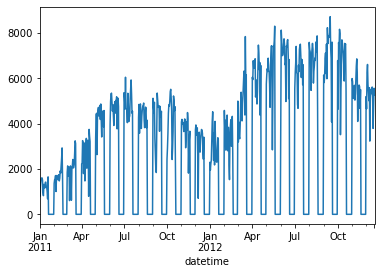

In [19]:
df["count"].resample('D').sum().plot()

<AxesSubplot:xlabel='dayofweek'>

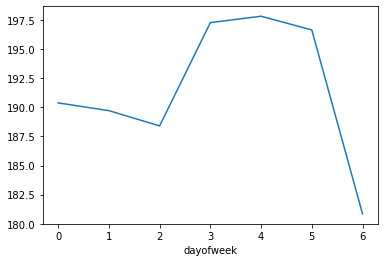

In [20]:
df["dayofweek"] = df.index.dayofweek
df.groupby("dayofweek")["count"].mean().plot(kind="line")

### Time shifting 

<AxesSubplot:xlabel='datetime'>

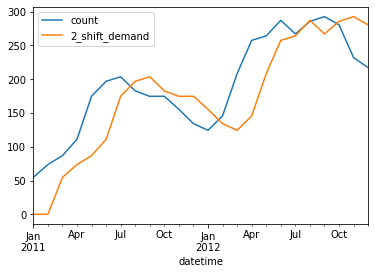

In [21]:
monthly_mean = df["count"].resample('M').mean()
monthly_mean_shift = monthly_mean.shift(periods=2, fill_value=0)
df_monthly = pd.DataFrame(monthly_mean, columns=["count"])
df_monthly["2_shift_demand"] = monthly_mean_shift
df_monthly.plot()

In [22]:
df_monthly

,count,2_shift_demand
datetime,,
2011-01-31,54.645012,0.000000
2011-02-28,73.641256,0.000000
2011-03-31,86.849776,54.645012
2011-04-30,111.026374,73.641256
2011-05-31,174.809211,86.849776
2011-06-30,196.877193,111.026374
2011-07-31,203.614035,174.809211
2011-08-31,182.666667,196.877193
2011-09-30,174.622517,203.614035


### Rolling expand

<AxesSubplot:xlabel='datetime'>

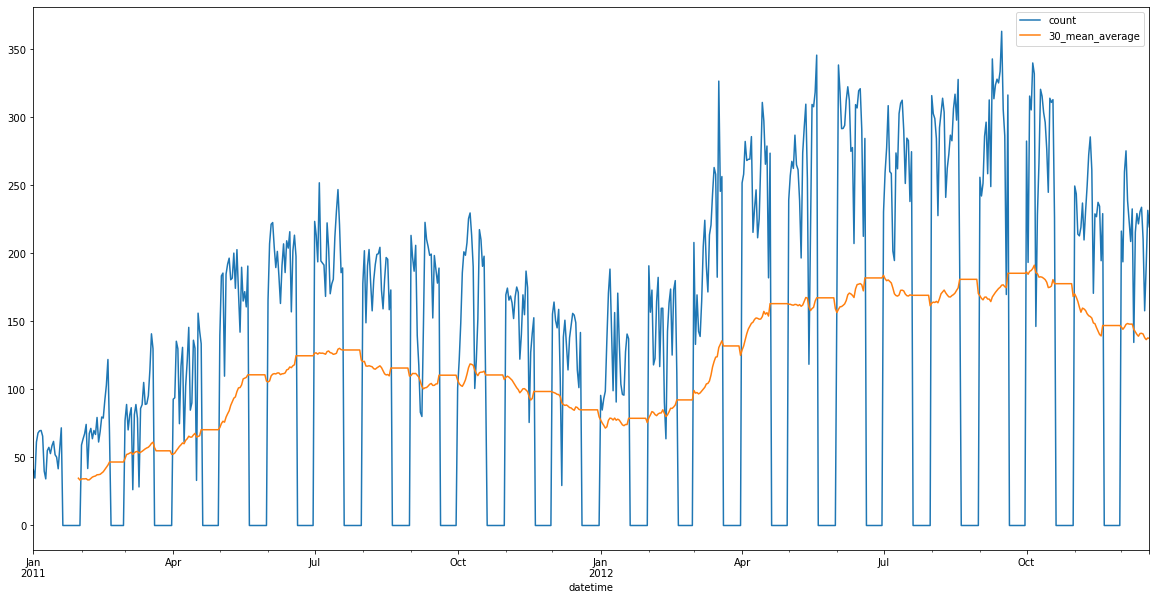

In [23]:
monthly_mean = df["count"].resample('D').mean().fillna(0)
monthly_mean_shift = monthly_mean.rolling(window=30, ).mean()
df_monthly = pd.DataFrame(monthly_mean, columns=["count"])
df_monthly["30_mean_average"] = monthly_mean_shift
df_monthly.plot(figsize=(20,10))

In [24]:
monthly_mean = df["count"].resample('M').mean().fillna(0)
cumsum = monthly_mean.cumsum()
df_monthly = pd.DataFrame(monthly_mean, columns=["count"])
df_monthly["cumsum"] = cumsum

<AxesSubplot:label='0d7adb3c-7337-4e6c-b638-0249034442bc'>

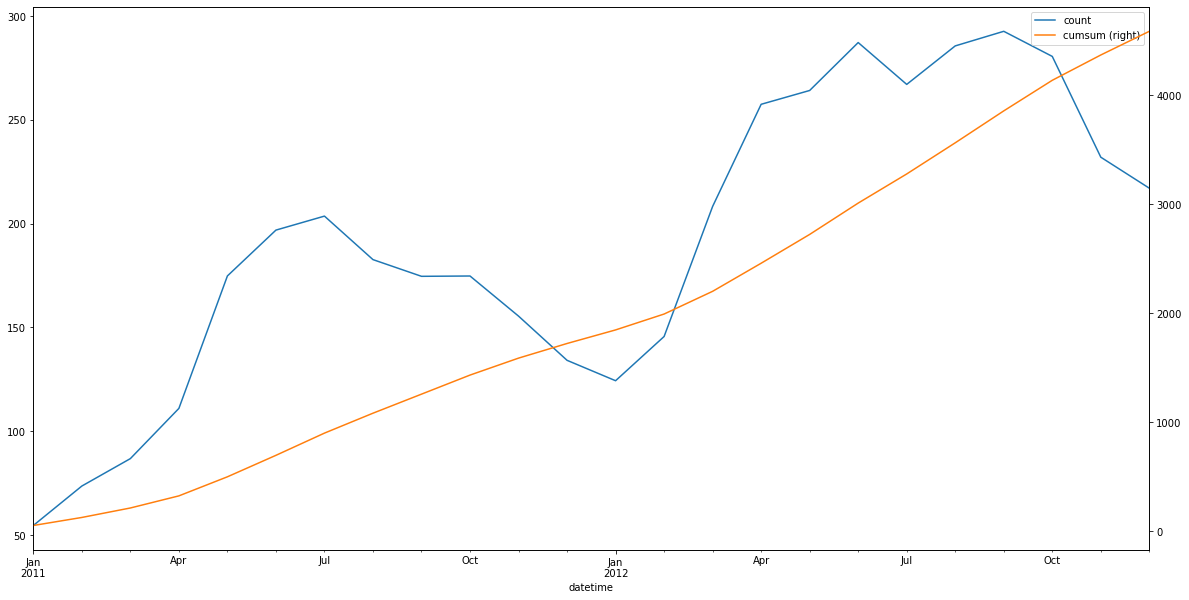

In [25]:
ax = df_monthly.plot(y='count', use_index=True)
df_monthly.plot(
    y='cumsum',secondary_y=True, 
    ax=ax, use_index=True, figsize=(20,10))


### Visualization

In [26]:
import matplotlib
import matplotlib.pyplot as plt

In [27]:
df["month"] = df.index.month
result_df = df.groupby(["month","dayofweek"])["count"].mean().reset_index()
# result_df = pd.crosstab(index=result_df["month"], columns=result_df["dayofweek"], values=result_df["count"], aggfunc=sum)

<AxesSubplot:xlabel='month', ylabel='dayofweek'>

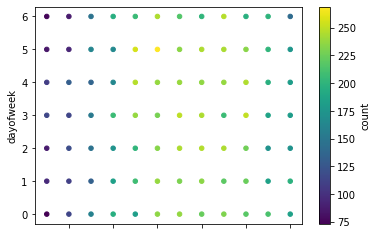

In [28]:
result_df.plot.scatter(x="month", y="dayofweek", c="count",  colormap='viridis')

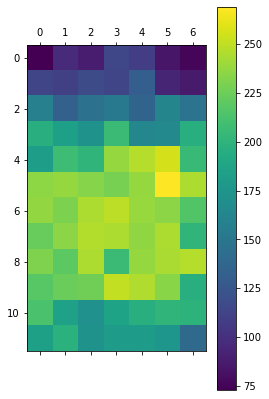

In [29]:
df["month"] = df.index.month
result_df = df.groupby(["month","dayofweek"])["count"].mean().reset_index()
result_df = pd.crosstab(index=result_df["month"], columns=result_df["dayofweek"], values=result_df["count"], aggfunc=sum)
plt.matshow(result_df)
# plt.xticks(range(len(df.columns)), df.columns)
# plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()

#### Time series sampling

In [30]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit()
print(tscv)

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]
